# Machine Learning: An Overview by Example

# The Problem

* Loan data for every customer who borrowed £1000 for 12mo

*	Examples/cases = row = single customer/loan.
*	Features = columns = fields = characteristics of customer/loan.
*   Target = the characteristic/column you’re trying to predict/understand
*	Problem: what model best describes the relationship of the features to the target?
*	Step 1: learn pattern (model) from data which describes features relationship to target
*	Step 2: use pattern to guess unknown target from known features 


## How do you do Machine Learning?

* In practice the "learning" step in a project is a very small number of programming lines (often one or two)
* Most time is spent exploring and preparing the data so that the scientist is aware of what analysis may be done
* And to rephrase the data to be compatible with the kind of analysis they wish to perform

### Python
* programming language
* libraries
* batteries included

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model as lm
from sklearn import preprocessing


### Domain Understanding

* understand the problem
* concepts and causes <- cannot be determined from data

### Data Understanding

In [2]:
data = pd.read_csv('loan_data.csv')
data.sample(3)

,ID,Income,Term,Balance,Debt,Score,Default
458,916,21400.0,Short Term,1150.0,0.0,162.0,False
800,29,81900.0,Long Term,3020.0,7620.0,818.0,False
738,744,63400.0,Short Term,1580.0,1468.0,902.0,False



```
 "ID",         Customer ID
 "Income",     Annual Pre-Tax Income on-application
 "Term" ,      Short or Long Term (6mo or 12mo)
 "Balance",    Current Account Balance on-application
 "Debt" ,      Outstanding Debt on-application
 "Score",      Credit Score (from referencing agency)
 "Default"     Observed Default (True = Default, False = Settle
```

In [3]:
# Summary Statistics
data.describe().round()

,ID,Income,Balance,Debt,Score
count,856.0,856.0,856.0,856.0,836.0
mean,497.0,29882.0,1214.0,644.0,451.0
std,288.0,13976.0,588.0,1150.0,269.0
min,1.0,11800.0,140.0,0.0,0.0
25%,246.0,19800.0,910.0,0.0,243.0
50%,494.0,22900.0,1120.0,65.0,376.0
75%,747.0,39025.0,1370.0,959.0,647.0
max,1000.0,86000.0,6020.0,12891.0,1000.0


#### Investigating Debt

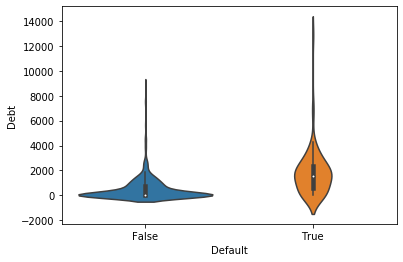

In [4]:
sns.violinplot(x="Default", y="Debt", data=data)

### Data Preparation
#### Cleaning

In [5]:
data.isna().sum()

ID          0
Income      0
Term        0
Balance     0
Debt        0
Score      20
Default     0
dtype: int64

In [6]:
df = data.dropna()
df.describe().round()

,ID,Income,Balance,Debt,Score
count,836.0,836.0,836.0,836.0,836.0
mean,496.0,29907.0,1219.0,648.0,451.0
std,289.0,14021.0,593.0,1154.0,269.0
min,1.0,11800.0,140.0,0.0,0.0
25%,246.0,19775.0,910.0,0.0,243.0
50%,494.0,22900.0,1120.0,71.0,376.0
75%,748.0,39025.0,1380.0,966.0,647.0
max,1000.0,86000.0,6020.0,12891.0,1000.0


### Remove unwanted fields

df.drop("ID", axis=1, inplace = True)

### Encoding

In [7]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

### Splitting Data

In [8]:
from sklearn.model_selection import train_test_split

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:6], df['Default'], test_size=0.3, random_state=1)


### Modelling
* logistic regression = learning a simple boundary in the data 





* classifier 
* "fit" means "learn" 
* once learnt the model may be reused

In [9]:
clf = lm.LogisticRegression(C=1e5, solver='lbfgs', max_iter=1000)

clf.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=1000)

* newton-cg — It's slow for large datasets
* lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. 
it saves memory. It isn't super fast with large data sets. It is the default solver as of Scikit-learn version 0.22.0.
* liblinear — Library for Large Linear Classification.  It is the default solver prior to v0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.
* sag — Stochastic Average Gradient descent.  Fast for big datasets.
* saga — Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

### Make Predictions

In [10]:
p_settle, p_default = clf.predict_proba(X_train.loc[1,:].to_numpy().reshape(-1, 5))[0]
print(p_default)

0.3223007605543684


In [11]:
prediction = clf.predict(X_train.loc[1,:].to_numpy().reshape(-1, 5))[0]
print(prediction)

0


### Evaluation

* The standard way of evaluating the accuracy of a model is by holding some of the intial data back, and asking it to predict it


### Confusion Matrix
![alt text](cmtpfp.png "Confusion Matrix")

### Accuracy

- It is simply the ratio of correctly predicted observations.
- Using accuracy is only good for symmetric data sets where the class distribution is 50/50 and the cost of false positives and false negatives are roughly the same.
- Example: you are building a model which predicts whether a device is defective: 
- The class distribution is such that 6 in 1000 devices is truly defective (positive). 
- A model which simply returns “negative” – i.e. not defective – all the time gets it right 99.4% of the time and therefore has an accuracy of 0.994, when in fact it never correctly identifies a defective device!

### Precision
- Precision looks at the ratio of correct positive observations.
- The formula is True Positives / (True Positives + False Positives).
- Note that the denominator is the count of all positive predictions, including positive observations of events which were in fact negative.
- Example: you are building a model which predicts whether a device is defective. let's assume our model predicts 8 out of 1000 devices being faulty. If only 5 of those 8 are truly defective the precision is 5/8 = 0.625.

### Recall

- Recall is also known as sensitivity or true positive rate. It’s the ratio of correctly predicted positive events.
- Recall is calculated as True Positives / (True Positives + False Negatives).
- Note that the denominator is the count of all positive events, regardless whether they were correctly predicted by the model.
- Using the same example as before, we already knew that 6 out of 1000 devices are truly defective. The model correctly predicted 5 of them. (It also predicted 3 incorrectly, but for the recall measure that’s not important). The recall therefore is 5/6 = 0.833.

### Comparing Precision and Recall

![alt text](precision_recall.png "Putting it all together")

### F1-score

- The F1 Score is the weighted average of Precision and Recall. 
- Therefore, this score takes both false positives and false negatives into account. 
- Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. 
- It works best if false positives and false negatives have similar cost. 
- If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
- The formula for F1 Score is 2*(Recall * Precision)/(Recall + Precision)

### Putting it all together

![alt text](performance.png "Putting it all together")

In [12]:
from sklearn.metrics import classification_report

default_guess_unseen = clf.predict(X_test)
default_known_unseen = y_test


print(classification_report(default_known_unseen, default_guess_unseen,target_names=["Settles", "Defaults"]))


              precision    recall  f1-score   support

     Settles       0.90      1.00      0.95       219
    Defaults       1.00      0.22      0.36        32

    accuracy                           0.90       251
   macro avg       0.95      0.61      0.65       251
weighted avg       0.91      0.90      0.87       251



* precision: of everything we labelled correctly, what % are defaults
* recall: of everything labelled "default", what % are defaults

### Confusion Matrix

![alt text](cm01.png "Confusion Matrix")